<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Sebastian Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda

### Equipo: Los Galácticos

- Nombre de alumno 1: Arturo Marín
- Nombre de alumno 2: Martín González


### **Link de repositorio de GitHub:** https://github.com/ArturoMarin9/Laboratorios-MDS7202-1

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/My Drive/Otoño 2024/Lab MDS/Laboratorios/'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(path+'/Lab 10/diabetes_data.csv')

df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.). Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes?,
  * ¿Qué buscan explicar las métricas utilizadas?
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

In [3]:
!pip install xgboost

Antes de responder lo que nos pide el enunciado, debemos seguir algunos pasos previos:


1.   Checkeamos missing values
2.   Interpretamos variables
3.   Asociamos un tipo de dato para cada variable



In [4]:
# 1. Checkeamos missing values en el dataset
missing_values = df.isnull().sum()
missing_values

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

No hay datos nulos, vamos al paso de darle un significado e interpretar cada una de las variables.

In [5]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


Dada la naturaleza de las variables, consideramos la siguiente interpretación para estas:

1. **Age**: Edad en la que se realiza el diagnóstico.
2. **Sex**: Género del individuo (0 para mujer, 1 para hombre).
3. **HighChol**: Si el individuo tiene colesterol alto (0 para no, 1 para sí).
4. **CholCheck**: Si el individuo ha tenido un chequeo de colesterol (0 para no, 1 para sí).
5. **BMI**: Índice de masa corporal del individuo.
6. **Smoker**: Si el individuo es fumador (0 para no, 1 para sí).
7. **HeartDiseaseorAttack**: Si el individuo ha tenido enfermedad del corazón o un ataque al corazón (0 para no, 1 para sí).
8. **PhysActivity**: Si el individuo realiza actividad física (0 para no, 1 para sí).
9. **Fruits**: Si el individuo consume frutas (0 para no, 1 para sí).
10. **Veggies**: Si el individuo consume verduras (0 para no, 1 para sí).
11. **HvyAlcoholConsump**: Si el individuo tiene un consumo excesivo de alcohol (0 para no, 1 para sí).
12. **GenHlth**: Estado de salud general del individuo (1 para excelente a 5 para pobre)
13. **MentHlth**: Número de días de mala salud mental en los últimos 30 días.
14. **PhysHlth**: Número de días de mala salud física en los últimos 30 días.
15. **DiffWalk**: Si el individuo tiene dificultad para caminar o subir escaleras (0 para no, 1 para sí).
16. **Stroke**: Si el individuo ha tenido un derrame cerebral (0 para no, 1 para sí).
17. **HighBP**: Si el individuo tiene presión arterial alta (0 para no, 1 para sí).
18. **Diabetes**: Si el individuo tiene diabetes (0 para no, 1 para sí) – esta es la variable objetivo.

Y con lo anterior, caracterizamos el tipo de variable para cada una de estas, como sigue:

**Variables Binarias**
*   Sex
*   HighChol
*   CholCheck
*   Smoker
*   HeartDiseaseorAttack
*   PhysActivity
*   Fruits
*   Veggies
*   HvyAlcoholConsump
*   DiffWalk
*   Stroke
*   HighBP
*   Diabetes

**Variables numéricas**
*   Age
*   BMI
*   MentHlth
*   PhysHlth

**Variables categóricas (ordinal)**

*   GenHlth

Ya con la interpretación definida para cada una de las variables, y el tipo de dato que se les asocia, podemos continuar. Primero separamos la data en conjuntos train, test y validation, para luego definir el column transformer.

**Nota:** Del resúmen estadístico también concluímos que la variable a predecir está relativamente balanceada de manera perfecta, por lo cual no consideramos ningún tipo de balanceo de clases.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Split the data into features and target variable
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Split the data into training (70%), validation (20%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'BMI', 'MentHlth', 'PhysHlth']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['GenHlth'])
    ],
    remainder='passthrough'  # Keep the binary variables as they are
)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the validation and test data
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Check the dimensions of the preprocessed data
train_shape = X_train_preprocessed.shape
val_shape = X_val_preprocessed.shape
test_shape = X_test_preprocessed.shape

train_shape, val_shape, test_shape

((49484, 17), (14139, 17), (7069, 17))

Ahora, creamos el pipeline, lo utilizamos, y reportamos métricas del modelo XGBoost

In [7]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# Create the pipeline with the column transformer and the XGBoost model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = pipeline.predict(X_val)

# Output the pipeline steps
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['GenHlth'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynod...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict on the validation data
y_val_pred = pipeline.predict(X_val)
y_val_proba = pipeline.predict_proba(X_val)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_roc = roc_auc_score(y_val, y_val_proba)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7506895820072141
Precision: 0.7305719921104536
Recall: 0.7901023890784983
F1 Score: 0.7591719614675138


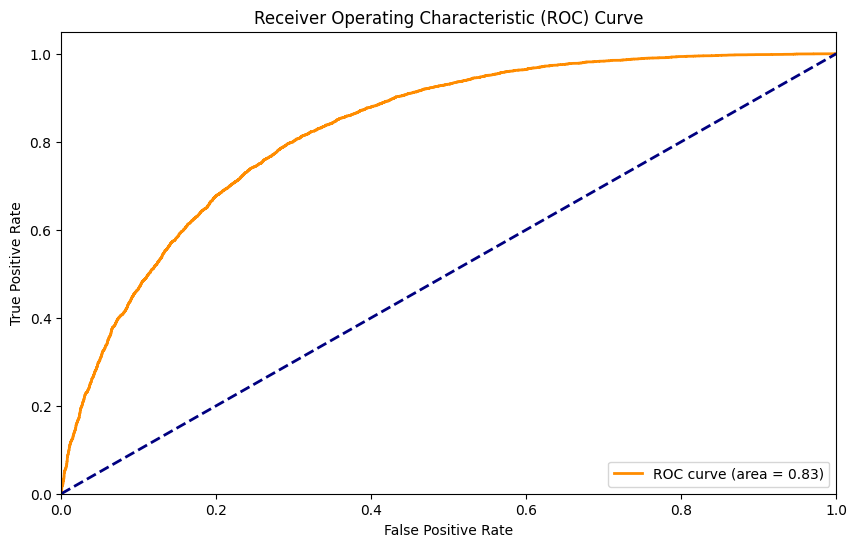

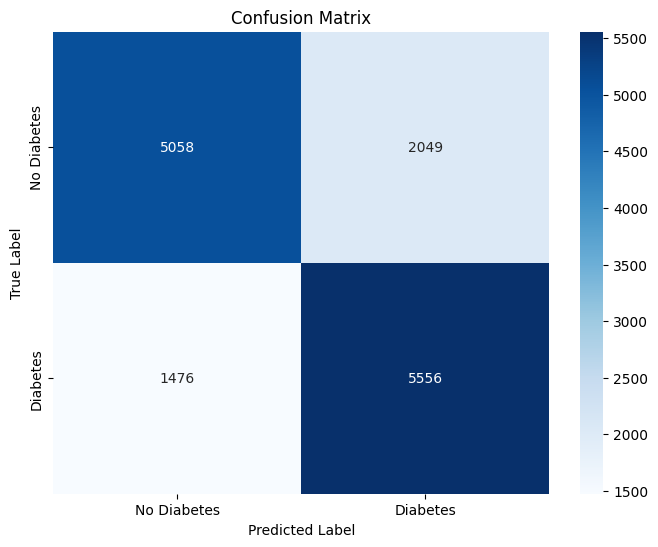

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plotting the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Comentarios sobre las decisiones y resultados de la primera iteración:

#### Decisiones Tomadas:
1. **División del Conjunto de Datos**:
   - Se dividió el conjunto de datos en conjuntos de entrenamiento (70%), validación (20%) y prueba (10%) para asegurar que se entrena y se valida adecuadamente el modelo antes de evaluarlo con datos no vistos.
   
2. **Transformación de Columnas**:
   - Se aplicó `StandardScaler` para escalar las variables numéricas (`Age`, `BMI`, `MentHlth`, `PhysHlth`).
   - Se utilizó `OrdinalEncoder` para la variable categórica ordinal `GenHlth`.
   - Las variables binarias se dejaron sin cambios ya que ya estaban adecuadamente codificadas como 0 y 1.

3. **Entrenamiento del Modelo**:
   - Se utilizó XGBoost como clasificador por su robustez y efectividad en tareas de clasificación (además lo pedían por enunciado).

4. **Evaluación del Modelo**:
   - Se evaluó el modelo utilizando métricas comunes de clasificación: Accuracy, Precision, Recall, F1 Score, y AUC-ROC.
   - Se visualizaron la matriz de confusión y la curva ROC para una mejor interpretación de los resultados.

#### Resultados Obtenidos:
- **Accuracy**: 0.7507
- **Precision**: 0.7306
- **Recall**: 0.7901
- **F1 Score**: 0.7592
- **AUC-ROC**: 0.83

### Respuestas a las preguntas (ii):

#### ¿Es acaso un buen predictor de diabetes?
Los resultados obtenidos indican que el modelo tiene un rendimiento razonablemente bueno en la predicción de diabetes. Con un Accuracy del 75% y un área bajo la curva ROC (AUC-ROC) de 0.83, el modelo muestra una buena capacidad para distinguir entre los pacientes con y sin diabetes. Sin embargo, siempre hay margen de mejora y se pueden considerar técnicas de ajuste de hiperparámetros o modelos más complejos para mejorar la precisión.

#### ¿Qué buscan explicar las métricas utilizadas?
- **Accuracy (Exactitud)**: Mide la proporción de todas las predicciones correctas (tanto positivos como negativos) entre el total de casos. En el contexto de la diabetes, nos dice qué tan bien el modelo está clasificando correctamente a los individuos como diabéticos o no diabéticos.

- **Precision (Precisión)**: Mide la proporción de verdaderos positivos (personas correctamente identificadas como diabéticas) entre todas las predicciones positivas (todas las personas clasificadas como diabéticas por el modelo). En el contexto de la diabetes, una alta precisión significa que cuando el modelo predice diabetes, es muy probable que la persona realmente tenga diabetes. Esto es crucial en situaciones donde un diagnóstico erróneo podría causar ansiedad innecesaria o tratamientos innecesarios.

- **Recall (Sensibilidad o Tasa de Verdaderos Positivos)**: Mide la proporción de verdaderos positivos entre todos los casos reales positivos (todas las personas que realmente tienen diabetes). En el contexto de la diabetes, un alto recall significa que el modelo está capturando la mayoría de los casos de diabetes, lo que es fundamental para asegurar que los individuos que tienen diabetes sean identificados y puedan recibir tratamiento.

- **F1 Score**: Es la media armónica de la precisión y el recall, y proporciona un equilibrio entre ambas métricas. En el contexto de la diabetes, el F1 Score es útil cuando necesitamos un balance entre precisión y recall, especialmente cuando tenemos un desbalance entre las clases y no queremos sacrificar uno por el otro.

- **AUC-ROC (Área bajo la curva ROC)**: Mide la capacidad del modelo para distinguir entre clases (diabéticos y no diabéticos). Un valor más alto de AUC-ROC indica que el modelo es mejor en distinguir entre individuos con y sin diabetes. Es una métrica robusta porque no depende de un umbral específico y considera todas las posibles tasas de verdaderos y falsos positivos.

En el contexto de la predicción de diabetes, donde la identificación correcta de individuos con diabetes es crítica para la intervención y tratamiento, **Recall (Sensibilidad)** puede ser considerada la métrica más relevante. Un alto recall asegura que la mayoría de los casos de diabetes son capturados por el modelo, minimizando los falsos negativos. Sin embargo, para un enfoque balanceado, el **F1 Score** también es importante ya que equilibra tanto la precisión como el recall, garantizando que las predicciones positivas sean tanto precisas como exhaustivas.

#### ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?
Las métricas utilizadas (Accuracy, Precision, Recall, F1 Score, AUC-ROC) son útiles para evaluar el rendimiento general del modelo y su capacidad para clasificar correctamente las instancias. Sin embargo, no proporcionan información directa sobre la importancia o la calidad de las características (features) utilizadas en el modelo.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`.
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

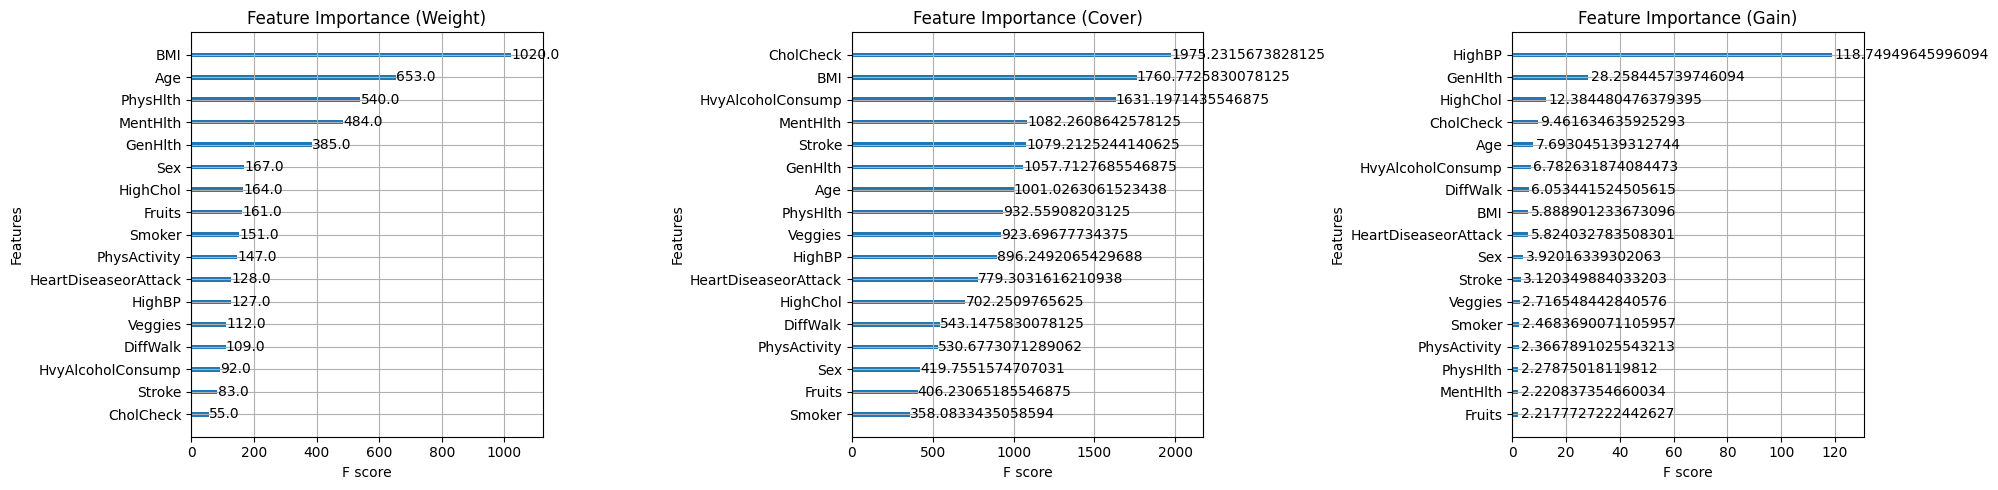

In [10]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Define feature names based on the preprocessing steps
feature_names = ['Age', 'BMI', 'MentHlth', 'PhysHlth', 'GenHlth',
                 'Sex', 'HighChol', 'CholCheck', 'Smoker',
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                 'Veggies', 'HvyAlcoholConsump', 'DiffWalk',
                 'Stroke', 'HighBP']

# Manually set the feature names in the XGBoost booster
pipeline.named_steps['classifier'].get_booster().feature_names = feature_names

# Calculate and plot feature importance using weight, cover, and gain
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Weight
plot_importance(pipeline.named_steps['classifier'], importance_type='weight', ax=axs[0])
axs[0].set_title('Feature Importance (Weight)')

# Cover
plot_importance(pipeline.named_steps['classifier'], importance_type='cover', ax=axs[1])
axs[1].set_title('Feature Importance (Cover)')

# Gain
plot_importance(pipeline.named_steps['classifier'], importance_type='gain', ax=axs[2])
axs[2].set_title('Feature Importance (Gain)')

plt.tight_layout()
plt.show()

### ii) ¿Los resultados obtenidos con los diferentes métodos son compatibles? Comente sus resultados y a qué se debe la igualdad o desigualdad que ve en los resultados.

Los métodos utilizados para calcular la importancia de las características son `weight`, `cover`, y `gain`. Aunque todos miden la importancia de las características, lo hacen desde diferentes perspectivas, lo que puede llevar a diferencias en los resultados.

- **Weight**: Mide la cantidad de veces que una característica aparece en los árboles del modelo. Los resultados muestran que `BMI`, `Age`, y `PhysHlth` son las características más importantes basadas en el número de veces que se utilizan para dividir los nodos.
  
- **Cover**: Mide la cantidad relativa de observaciones que son afectadas por una característica. En este caso, `CholCheck`, `BMI`, y `HvyAlcoholConsump` son las características más importantes, indicando que estas características afectan a una gran cantidad de observaciones en los nodos donde se utilizan.
  
- **Gain**: Mide la mejora promedio en precisión obtenida por una característica al dividir. Aquí, `HighBP` es la característica más importante, seguida de `GenHlth` y `HighChol`. Esto indica que estas características proporcionan la mayor ganancia en términos de reducción de la incertidumbre.

#### Compatibilidad y Diferencias:
- **Compatibilidad**: Hay algunas características que son relativamente consistentes en los tres métodos, como `BMI`, `Age` y `GenHlth`, lo cual indica que estas características son importantes desde múltiples perspectivas.
- **Diferencias**: Las diferencias se deben a la naturaleza de cada métrica. `Weight` puede ser sesgado hacia características que aparecen frecuentemente, aunque no sean las más predictivas. `Cover` destaca características que afectan a muchas observaciones, y `Gain` prioriza aquellas que contribuyen más a la precisión del modelo.

### iii) Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

#### Importancia de Características para Interpretabilidad:
Las importancias de características proporcionan una visión de cuáles características son más influyentes en el modelo, pero no son suficientes para una interpretabilidad completa. Aquí están algunas razones:

1. **Contexto Relativo**: Las importancias no explican cómo interactúan las características entre sí ni cómo afectan las predicciones en combinación.
2. **Direccionalidad**: No indican si un aumento en el valor de una característica aumenta o disminuye la probabilidad de la clase objetivo.
3. **Interacciones Complejas**: No capturan las interacciones complejas entre las características que los modelos de árboles pueden manejar.

#### Debilidades:
1. **Sesgo hacia características con muchos niveles**: Características con más niveles (categorías) pueden tener una importancia más alta simplemente porque aparecen más frecuentemente en los nodos.
2. **Interpretación Global vs. Local**: Las importancias proporcionan una visión global del modelo, pero pueden no reflejar la variabilidad en diferentes partes del espacio de las características.

### Alternativas para Mejorar la Interpretabilidad:
1. **SHAP (SHapley Additive exPlanations)**: Proporciona interpretaciones tanto globales como locales, mostrando cómo cada característica contribuye a cada predicción.
2. **LIME (Local Interpretable Model-agnostic Explanations)**: Ofrece explicaciones locales para predicciones específicas.
3. **PDP (Partial Dependence Plots)**: Muestran el efecto promedio de una característica en la predicción, manteniendo todas las demás características constantes.

En resumen, aunque las importancias de las características son útiles, se recomienda utilizar métodos complementarios como SHAP o LIME para obtener una interpretación más rica y detallada del modelo.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features.
2. Visualice los resultados de este método en un gráfico.
3. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?).
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta?
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado.

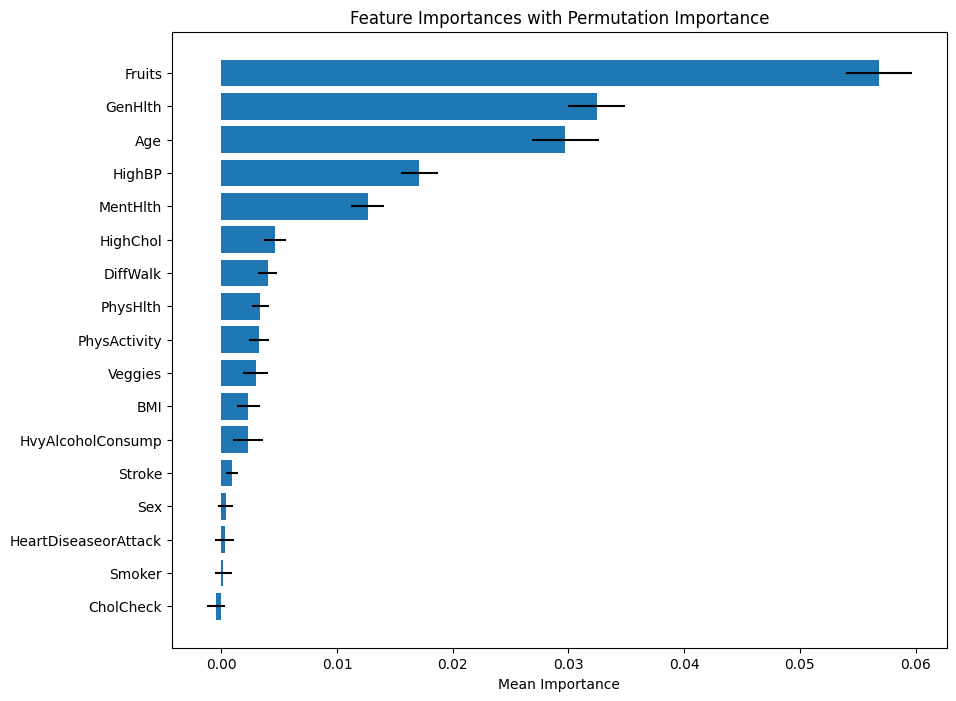

Feature: Fruits, Mean Importance: 0.0568, Std Dev: 0.0028
Feature: GenHlth, Mean Importance: 0.0325, Std Dev: 0.0025
Feature: Age, Mean Importance: 0.0297, Std Dev: 0.0029
Feature: HighBP, Mean Importance: 0.0171, Std Dev: 0.0016
Feature: MentHlth, Mean Importance: 0.0126, Std Dev: 0.0014
Feature: HighChol, Mean Importance: 0.0046, Std Dev: 0.0009
Feature: DiffWalk, Mean Importance: 0.0040, Std Dev: 0.0008
Feature: PhysHlth, Mean Importance: 0.0034, Std Dev: 0.0007
Feature: PhysActivity, Mean Importance: 0.0033, Std Dev: 0.0008
Feature: Veggies, Mean Importance: 0.0030, Std Dev: 0.0011
Feature: BMI, Mean Importance: 0.0023, Std Dev: 0.0010
Feature: HvyAlcoholConsump, Mean Importance: 0.0023, Std Dev: 0.0013
Feature: Stroke, Mean Importance: 0.0009, Std Dev: 0.0005
Feature: Sex, Mean Importance: 0.0004, Std Dev: 0.0006
Feature: HeartDiseaseorAttack, Mean Importance: 0.0003, Std Dev: 0.0008
Feature: Smoker, Mean Importance: 0.0002, Std Dev: 0.0007
Feature: CholCheck, Mean Importance: -0.

In [11]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import numpy as np

# Perform permutation importance
result = permutation_importance(pipeline, X_val, y_val, n_repeats=30, random_state=42)

# Extract the mean and standard deviation of the importances
perm_importances_mean = result.importances_mean
perm_importances_std = result.importances_std

# Sort the features by importance
indices = np.argsort(perm_importances_mean)

# Plot the feature importances with error bars in sorted order
plt.figure(figsize=(10, 8))
plt.barh(np.array(feature_names)[indices], perm_importances_mean[indices], xerr=perm_importances_std[indices], align='center')
plt.xlabel('Mean Importance')
plt.title('Feature Importances with Permutation Importance')
plt.show()

# Print the results
for i in indices[::-1]:
    print(f"Feature: {feature_names[i]}, Mean Importance: {perm_importances_mean[i]:.4f}, Std Dev: {perm_importances_std[i]:.4f}")

### i) Al verificar la desviación estándar de los resultados, ¿Qué señala esta?

Al revisar la desviación estándar de los resultados obtenidos mediante la permutación de importancia, observamos que:

- Las desviaciones estándar son generalmente pequeñas, lo que indica una consistencia alta en la importancia de las características a través de las permutaciones.
- Características como `Fruits`, `GenHlth`, `Age`, `HighBP` y `MentHlth` tienen desviaciones estándar bajas en relación con su importancia media, lo que refuerza la confianza en su influencia significativa en el modelo.
- Características con importancia media cercana a cero, como `CholCheck`, `Smoker`, y `HeartDiseaseorAttack`, también muestran desviaciones estándar bajas, indicando que su baja importancia es consistente.

### ii) ¿Cómo mide la importancia de las features su propuesta?

El método de permutación mide la importancia de las características evaluando la disminución en la precisión del modelo cuando se permutan aleatoriamente los valores de una característica mientras se mantienen los valores de las otras características. Este proceso se repite múltiples veces (en este caso, 30 veces), y se calcula la media y la desviación estándar de la disminución en la precisión. Las características que causan una mayor disminución en la precisión del modelo al ser permutadas se consideran más importantes.

### iii) ¿Qué features tienen un mayor impacto en la salida del modelo? Comente las 5 primeras, ¿tienen sentido?

Las cinco características con mayor impacto en la salida del modelo son:

1. **Fruits** (Importancia media: 0.0568, Desviación estándar: 0.0028)
2. **GenHlth** (Importancia media: 0.0325, Desviación estándar: 0.0025)
3. **Age** (Importancia media: 0.0297, Desviación estándar: 0.0029)
4. **HighBP** (Importancia media: 0.0171, Desviación estándar: 0.0016)
5. **MentHlth** (Importancia media: 0.0126, Desviación estándar: 0.0014)

#### Comentarios sobre las cinco primeras características:

1. **Fruits**: La importancia de esta característica sugiere que el consumo de frutas podría estar significativamente asociado con la presencia o ausencia de diabetes en la población estudiada. Esto tiene sentido, ya que una dieta rica en frutas puede estar relacionada con un estilo de vida más saludable y un mejor control de la glucosa en sangre.

2. **GenHlth**: El estado de salud general es una medida integral que puede reflejar varios aspectos de la salud y el bienestar, incluyendo la predisposición a enfermedades crónicas como la diabetes. Tiene sentido que esta característica sea importante, ya que un peor estado de salud general podría estar asociado con una mayor probabilidad de tener diabetes.

3. **Age**: La edad es un factor de riesgo conocido para la diabetes, con una mayor prevalencia de la enfermedad en personas mayores. Por lo tanto, es lógico que la edad sea una característica importante en el modelo.

4. **HighBP**: La hipertensión (presión arterial alta) es una comorbilidad común en personas con diabetes. La relación entre la hipertensión y la diabetes está bien documentada, lo que explica la alta importancia de esta característica.

5. **MentHlth**: La salud mental también puede influir en el manejo de la diabetes, ya que problemas de salud mental como la depresión y la ansiedad pueden afectar el control de la glucosa y el comportamiento de autocuidado. Por lo tanto, tiene sentido que la salud mental sea una característica significativa en el modelo.

En resumen, las cinco características con mayor impacto en el modelo tienen sentido desde una perspectiva clínica y epidemiológica, ya que todas están relacionadas con factores de riesgo o comorbilidades asociadas con la diabetes.

### iv) ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

Al comparar las importancias de las características obtenidas con los diferentes métodos (`weight`, `cover`, `gain` de XGBoost y `permutation importance`), observamos algunas diferencias y similitudes:

#### Similitudes:
- **GenHlth** y **Age** aparecen consistentemente entre las características más importantes en ambos métodos (`cover`, `gain` y `permutation importance`).
  
#### Diferencias:
- **Fruits** es la característica más importante según el método de permutación, pero no es destacada en los métodos `weight`, `cover` y `gain` de XGBoost. Esto podría indicar que `Fruits` tiene un impacto significativo en la predicción del modelo que no se refleja en la frecuencia o ganancia de las divisiones en los árboles.
- **BMI**, que es muy importante según `weight` y `cover`, tiene una importancia mucho menor según el método de permutación.

Estas diferencias pueden deberse a la naturaleza de los métodos. Los métodos basados en árboles (como `weight`, `cover`, `gain`) pueden sesgarse hacia características que frecuentemente dividen los nodos, mientras que el método de permutación evalúa el impacto directo de cada característica en la precisión del modelo.

### v) Nombre y explique 3 ventajas y 3 desventajas del método implementado (permute importance).

#### Ventajas:
1. **Interpretabilidad Directa**: La permutación de importancia mide directamente el impacto de cada característica en la precisión del modelo, proporcionando una interpretación clara y directa de la importancia de cada característica.
2. **No Asume Linealidad**: A diferencia de algunos métodos estadísticos, no asume una relación lineal entre las características y la variable objetivo, lo que lo hace adecuado para modelos complejos como XGBoost.
3. **Captura Interacciones**: Puede capturar la importancia de las interacciones entre características, ya que evalúa el impacto de permutar una característica mientras mantiene las demás constantes.

#### Desventajas:
1. **Computacionalmente Intensivo**: Requiere múltiples reevaluaciones del modelo, lo que puede ser computacionalmente costoso y lento, especialmente con grandes conjuntos de datos o modelos complejos.
2. **Sensibilidad al Azar**: Los resultados pueden variar con diferentes semillas aleatorias, aunque se mitigue repitiendo el proceso varias veces y calculando la media y la desviación estándar.
3. **Puede Subestimar Características Colineales**: Si dos características están altamente correlacionadas, permutar una puede no tener un gran impacto en la precisión del modelo porque la otra característica puede compensar, subestimando así su importancia real.

En conclusión, aunque el método de permutación de importancia proporciona una evaluación robusta de la importancia de las características, es importante considerar sus limitaciones y complementarlo con otros métodos y análisis para obtener una interpretación más completa del modelo.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo.
2. ¿Qué representa cada número en su resultado?
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [12]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.5 MB/s eta 0:00:00


In [13]:
!pip install shap --upgrade

In [14]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [15]:
# Inserte código para calcular shapley values aquí
import shap

explainer = shap.TreeExplainer(pipeline['classifier'])
shap_values = explainer(df[feature_names])

In [16]:
shap_values

.values =
array([[ 0.43848833,  1.7849689 , -0.23467642, ...,  0.02177559,
         0.08877479,  0.3964419 ],
       [ 0.42742157,  0.4240379 , -0.37855893, ...,  0.08397009,
        -0.44374478,  0.37430903],
       [ 1.1621565 ,  2.0741286 , -0.10257529, ...,  0.06284864,
         0.04441845, -0.5160691 ],
       ...,
       [ 0.13058348,  1.4274575 ,  0.26611406, ..., -0.03471437,
         0.05272   ,  0.3944682 ],
       [ 0.04034553,  0.8438506 , -0.3865821 , ..., -0.14733626,
         0.0522012 ,  0.4999203 ],
       [ 0.4057637 ,  1.8444521 , -0.20990407, ...,  0.08772738,
         0.03880919,  0.45050916]], dtype=float32)

.base_values =
array([-0.00885369, -0.00885369, -0.00885369, ..., -0.00885369,
       -0.00885369, -0.00885369], dtype=float32)

.data =
array([[ 4., 26.,  5., ...,  0.,  0.,  1.],
       [12., 26.,  0., ...,  0.,  1.,  1.],
       [13., 26.,  0., ...,  0.,  0.,  0.],
       ...,
       [13., 25., 15., ...,  1.,  0.,  1.],
       [11., 18.,  0., ...,  1.,  0.

Un valor SHAP (SHapley Additive exPlanations) para una feature específica en una instancia de datos indica cuánto contribuye esa feature a la diferencia entre la predicción del modelo para esa instancia y la predicción promedio del modelo en todo el conjunto de datos.

Un SHAP positivo (negativo) significa que la presencia de esa feature aumenta (disminuye) la predicción del modelo en comparación con el valor base (promedio de todo el dataset).

### 5.2 Aporte local (0.4 puntos)


1. Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

  - ¿Existe algún patrón común entre las instancias analizadas?

  - ¿Es posible generalizar estas conclusiones a todo el dataset?

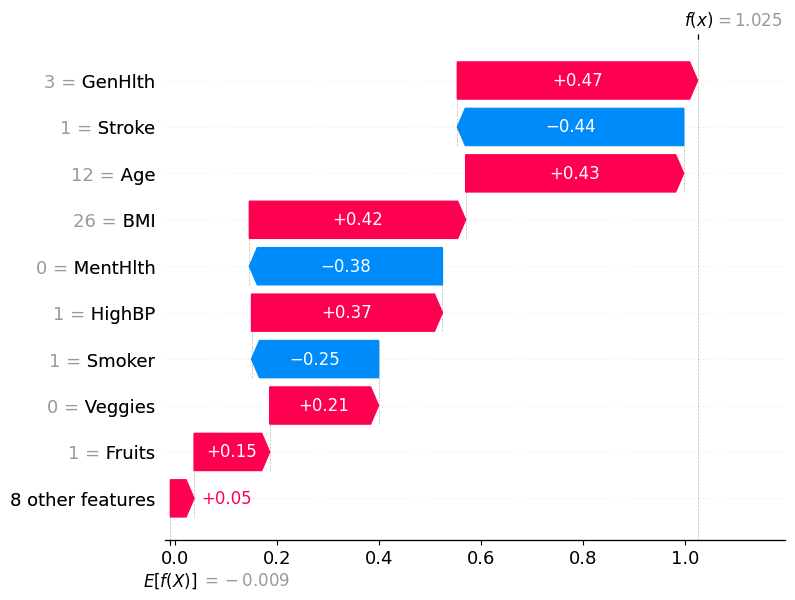


 1


In [17]:
# Inserte código para generar gráficos de aporte local aquí

idx = 1

shap.plots.waterfall(shap_values[idx, :])
print("\n", pipeline.predict(df[feature_names])[idx])

Para la instancia 1 es posible observar que features como `GenHlth`, `Age`, `BMI`, `HighBP`, `Veggies` y `Fruits`, contribuyen de manera positiva a la probabilidad de padecer diabetes, mientras que features como `Stroke`, `MentHlth` y `Smoker`, contribuyen de manera negativa. Las variables que tienen una gran relevancia en este fenómeno son `GenHlth`, `Stroke` y `Age`.



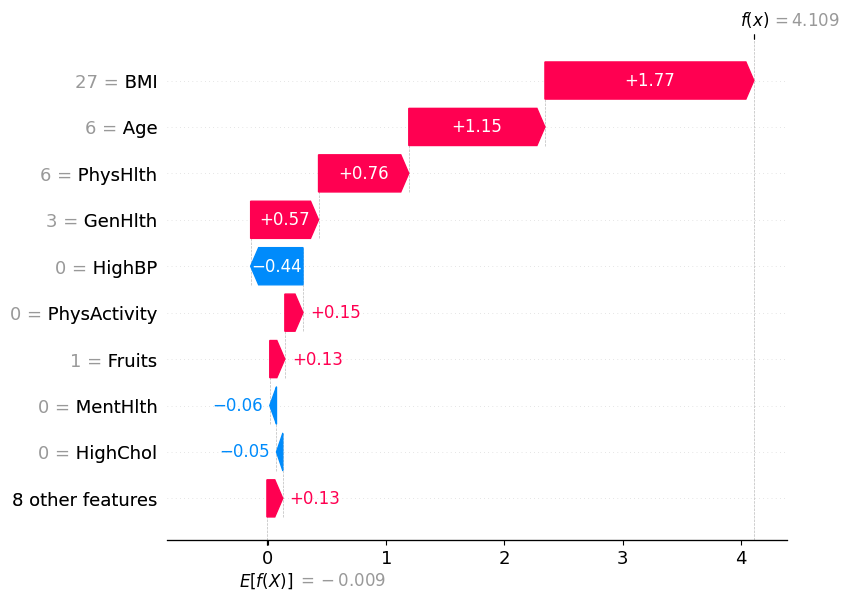


 0


In [18]:
idx = 9

shap.plots.waterfall(shap_values[idx, :])
print("\n", pipeline.predict(df[feature_names])[idx])

Para la instancia 9 es posible observar que features como `GenHlth`, `Age`, `BMI`, `Fruits`, `PhysHIth` y `PhysActivity`, contribuyen de manera positiva a la probabilidad de padecer diabetes, mientras que features como `HighBP`, `MentHlth` y `HighChol`, contribuyen de manera negativa. Se destaca como variable que tiene una gran relevancia en este fenómeno son a `BMI`.


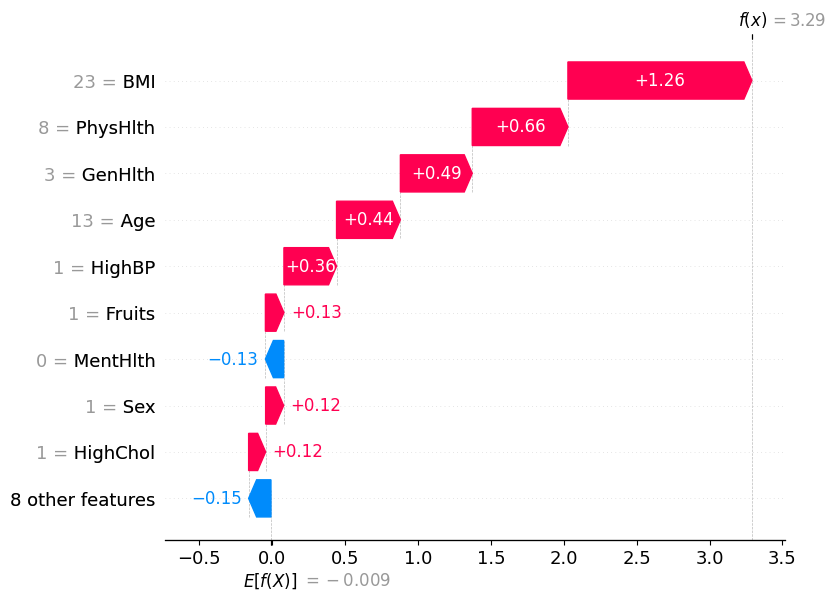


 1


In [19]:
idx = 150

shap.plots.waterfall(shap_values[idx, :])
print("\n", pipeline.predict(df[feature_names])[idx])

Para la instancia 9 es posible observar que features como `GenHlth`, `Age`, `BMI`, `Fruits`, `PhysHIth`, `PhysActivity` y `HighChol`, contribuyen de manera positiva a la probabilidad de padecer diabetes, mientras que features como `HighBP` y `MentHlth`, contribuyen de manera negativa. Se destaca como variable que tiene una gran relevancia en este fenómeno son a `BMI`.



De cierta manera, se podría señalar que existe un patrón común entre las instancias analizadas. Las variables `GenHlth`, `Age`, y `BMI` consistentemente contribuyen de manera positiva a la probabilidad de tener diabetes, mientras que `MentHlth` contribuye de manera negativa en las tres instancias. Este patrón sugiere que ciertas variables tienen un impacto recurrente y significativo en la predicción del modelo.

Estas observaciones permiten inferir que el modelo podría considerar de manera consistente ciertos factores al evaluar la probabilidad de diabetes, proporcionando una base para entender cómo las características individuales afectan las predicciones a nivel local.

Aunque los patrones observados en estas tres instancias pueden proporcionar información valiosa, no es suficiente para generalizar completamente a todo el dataset. Las conclusiones basadas en estas instancias específicas deben ser validadas y complementadas con análisis adicionales en más instancias y mediante métodos estadísticos para garantizar que las observaciones sean representativas del comportamiento general del modelo en el dataset completo.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

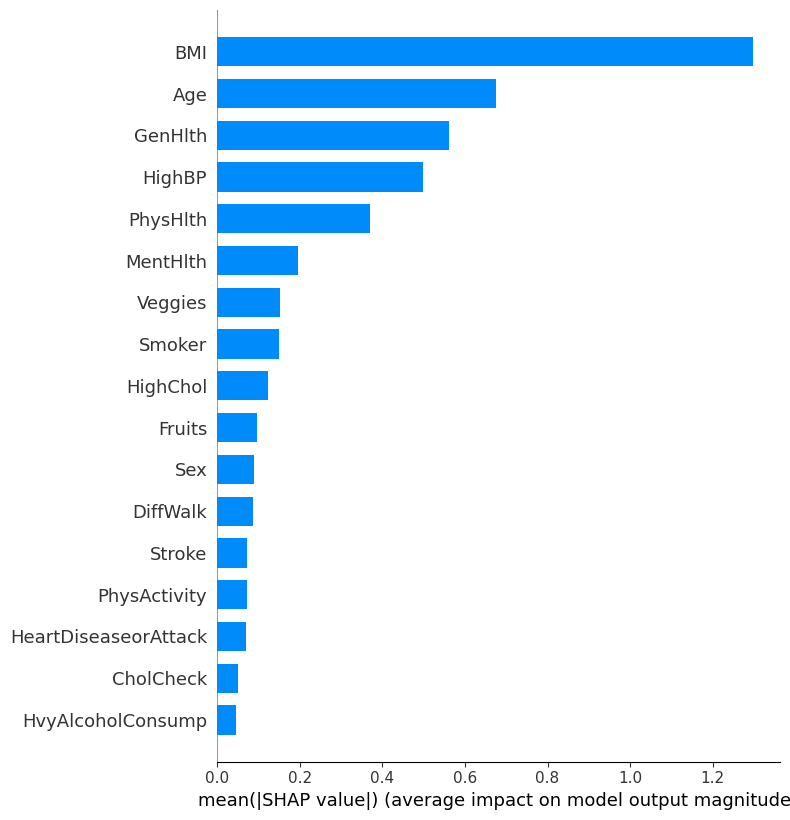

In [20]:
shap.summary_plot(shap_values, df[feature_names], plot_type="bar")

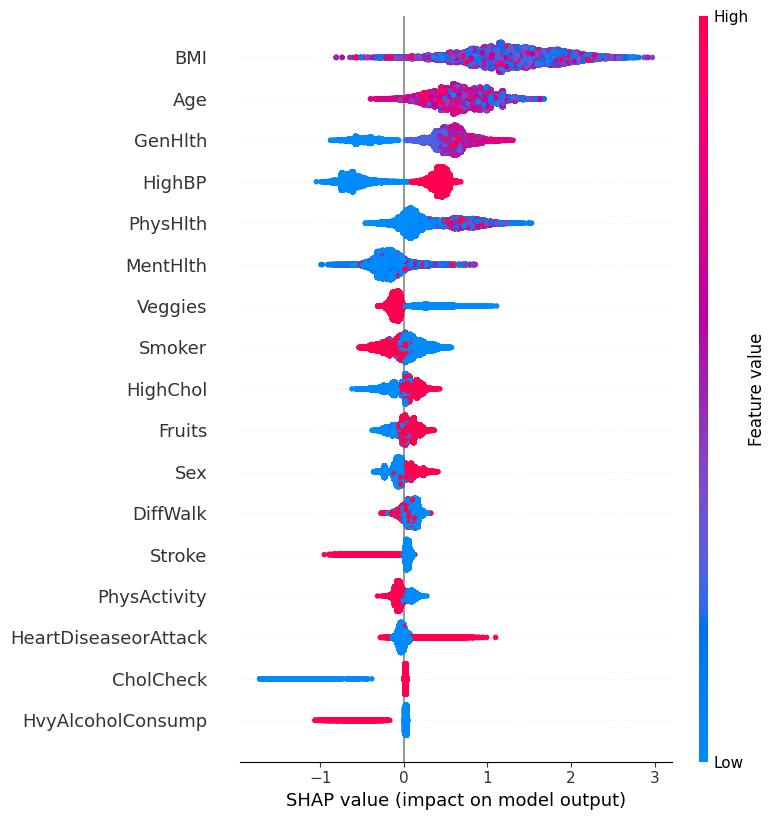

In [21]:
shap.summary_plot(shap_values, df[feature_names])


Es posible ver que sí se mantienen las conclusiones heredadas de la sección anterior, pues se observa que las features `GenHlth`, `Age`, y `BMI` mantienen su relevancia en promedio cuando miramos al dataset completo,  contribuyendo así de manera positiva a la probabilidad de tener negativas. Lo mismo ocurre con `MentHlth`pero contribuyendo negativamente en promedio. Cabe destacar ciertas features cuyos SHAP values se "activan" solo cuando toman un valor específico (tales como `ColCheck` y `HvyAlcoholConsump`).

### 5.4 Scatter plot (0.4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

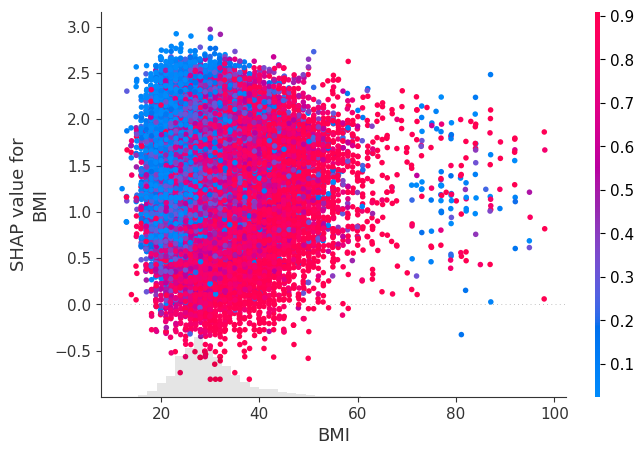

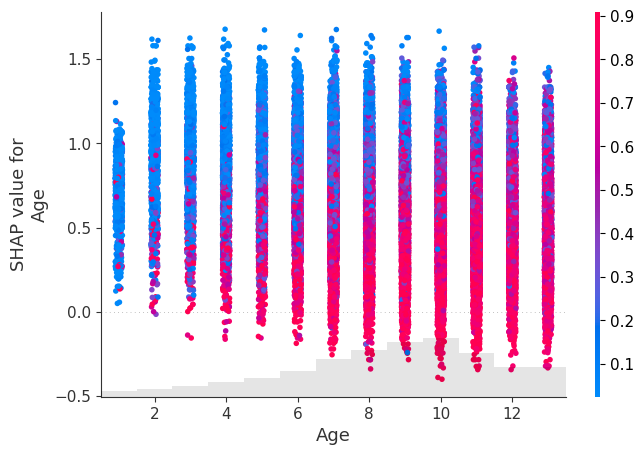

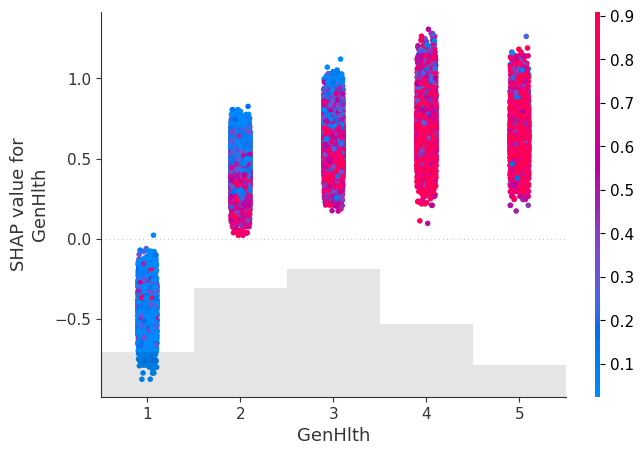

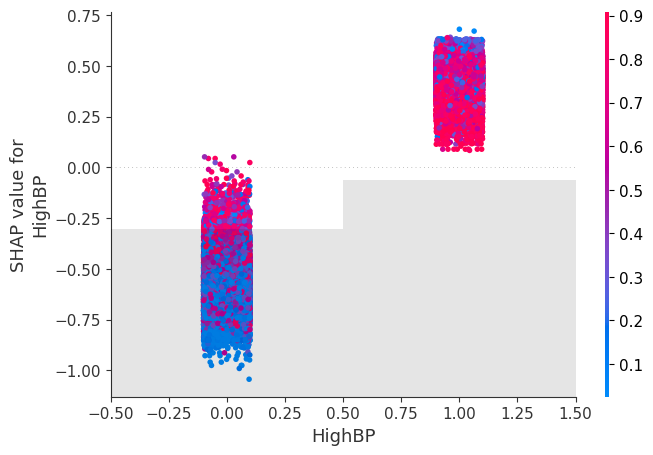

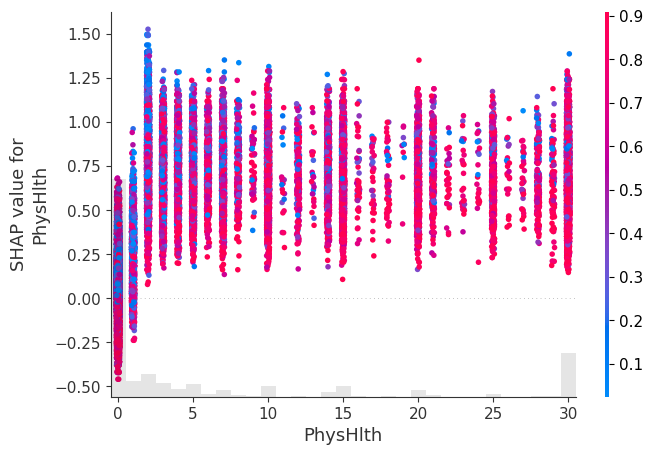

In [22]:
selected_columns = ['BMI', 'Age', 'GenHlth', 'HighBP', 'PhysHlth']

for name in selected_columns:
    shap.plots.scatter(
        shap_values[:, name],
        color=pipeline.predict_proba(df[feature_names])[:, 1],
    )

De los gráficos anteriores se tiene que:


* A partir de cierto umbral de `BMI` (~30), las probabilidades de tener diabetes aumentan.

* Para la variable de edad (`Age`) los SHAP values están altamente distribuidos sobre los valores de edad, aunque existe una muy pequeña tendencia (muy dispersa) respecto a que a medida que aumenta la edad disminuyen los SHAP values, es decir, mientras más edad, la contribución de esta variable se hace menos relevante (o levemente negativa) para predecir la diabetes. Aunque cabe destacar que aquellas edades más grandes concentran las mayores probabilidades de padecer la enfermedad, por lo que da para pensar que en esos casos otras features toman más relevancia.

* A medida que aumenta el valor de la variable `GenHlth`, aumenta la probabilidad de que el paciente posea diabetes.

* El tener un una alta presión alterial (`HighBP`=1) es en promedio un buen indicador para tener una alta probabilidad de tener diabetes

* En cuanto a la feature `PhysHith`, recordando que hace referencia al número de días de mala salud física en los últimos 30 días. Se tien que para una cantidad de días pequeñas (menor a 5), podría disminuir la probabilidad de tener diabetes, pero desde un número bajo como 5 días, ya se observa que podría aumentar la probabilidad de tener diabetes.


### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [23]:
# Inserte código para generar gráficos PDP aquí
X_1000 = shap.utils.sample(
    df[feature_names],
    1000,
    random_state=42
)

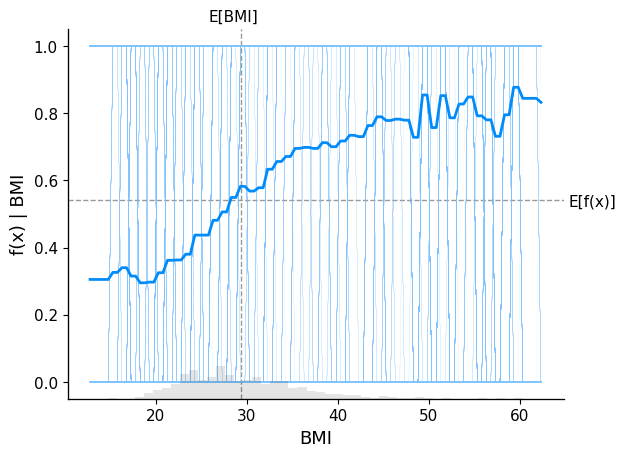

In [24]:
shap.partial_dependence_plot(
    "BMI",
    pipeline.predict,
    X_1000,
    model_expected_value=True,
    feature_expected_value=True,
)

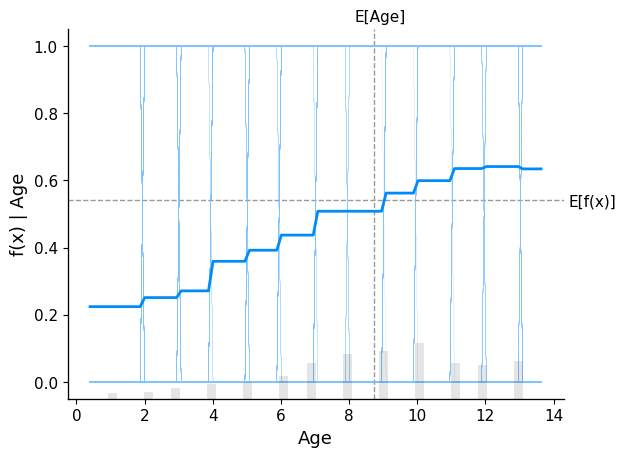

In [25]:
shap.partial_dependence_plot(
    "Age",
    pipeline.predict,
    X_1000,
    model_expected_value=True,
    feature_expected_value=True,
)

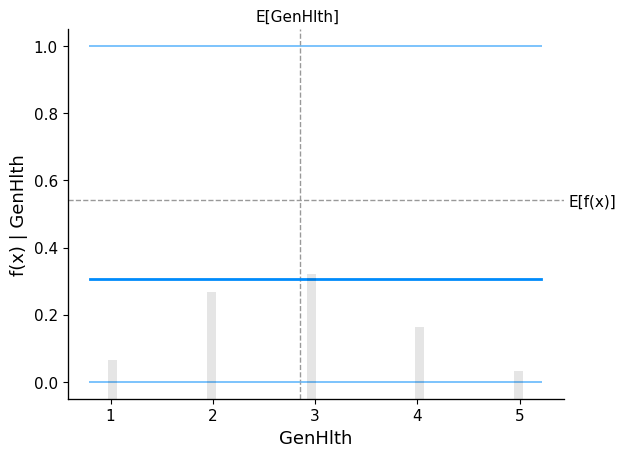

In [26]:
shap.partial_dependence_plot(
    "GenHlth",
    pipeline.predict,
    X_1000,
    model_expected_value=True,
    feature_expected_value=True,
)

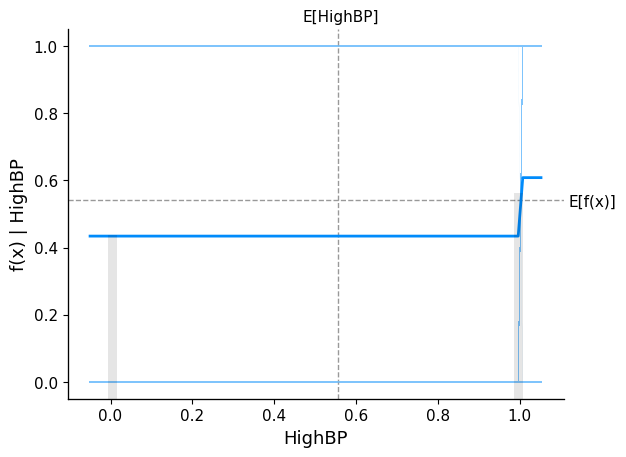

In [27]:
shap.partial_dependence_plot(
    "HighBP",
    pipeline.predict,
    X_1000,
    model_expected_value=True,
    feature_expected_value=True,
)

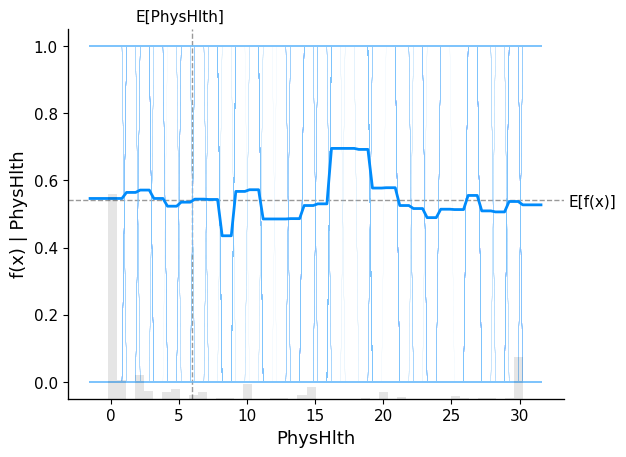

In [28]:
shap.partial_dependence_plot(
    "PhysHlth",
    pipeline.predict,
    X_1000,
    model_expected_value=True,
    feature_expected_value=True,
)

De los gráficos anteriores se puede observar:

* La contribución marginal promedio de la variable BMI respecto a la probabilidad de padecer diabetes es creciente en la mayor parte del rango, decreciendo desde `BMI`=65 (aprox.).

* La contribución marginal promedio de la variable `Age` respecto a la probabilidad de padecer diabetes es creciente en todo su rango, atravesando el umbral del 50% cuando toma el valor 9.

* La contribución marginal promedio de la variable `GenHlth` respecto a la probabilidad de padecer diabetes es constante en todo el rango. Lo que sin duda llama la atención

* La contribución marginal promedio de las variables `HighBP` respecto a la probabilidad de padecer diabetes es creciente. En particular, cuando la feature toma el valor 1, la probabilidad de padecimiento atraviesa el umbral del 50%.

*  La contrubución marginal de la variable `PhysHith` es muy cambiante, pero peresenta un peak entre los 15 y 20 días.

Aunque estos insights hacen sentido, a excepción de `GenHlth`, hay que tener en mente que estas son contribuciones marginales promedio, por lo que puede haber imprecisiones al querer adjudicar este comportamiento a algún datapoint.

## 6. Sistema de Reglas! (1.0 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [29]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.0 MB/s eta 0:00:00


In [30]:
from alibi.explainers import AnchorTabular

In [31]:
explainer = AnchorTabular(
    pipeline["classifier"].predict,
    feature_names=feature_names,
    seed=42
)

explainer.fit(
    pipeline["preprocessor"].transform(X_train)
)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 42, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)

In [32]:
class_names = ["no_diabetes", "diabetes"]

In [33]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print()

idx = 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print()

idx = 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  diabetes
Anchor: GenHlth > 3.00 AND HighBP > 0.00
Precision: 0.95
Coverage: 0.07

Prediction:  diabetes
Anchor: GenHlth > 3.00 AND BMI > 0.44
Precision: 0.97
Coverage: 0.03

Prediction:  diabetes
Anchor: GenHlth > 3.00 AND BMI > -0.12 AND Age > 0.15
Precision: 1.00
Coverage: 0.02


Las reglas parecen tener sentido, ya que están basadas en características de salud relevantes como el estado general de salud (GenHlth), la presión arterial alta (HighBP), el índice de masa corporal (BMI) y la edad. Es razonable esperar que estas características estén relacionadas con el riesgo de diabetes.

Sin embargo, es importante considerar el impacto de estas reglas en todo el conjunto de datos. Las métricas proporcionadas indican la precisión y la cobertura de las reglas. La precisión indica la proporción de observaciones para las cuales las reglas son verdaderas y la cobertura indica la proporción de observaciones que cumplen las reglas en comparación con todas las observaciones.

Aunque las reglas pueden tener alta precisión para las observaciones específicas mencionadas, la cobertura es relativamente baja. Esto significa que las reglas se aplican solo a una pequeña fracción de las observaciones en el conjunto de datos. Por lo tanto, aunque las reglas son precisas para las observaciones seleccionadas, pueden no ser representativas de todas las situaciones y pueden no ser generalizables para todas las personas.

De esta forma, si bien las reglas propuestas tienen sentido para las observaciones específicas mencionadas, es importante considerar su impacto en todo el conjunto de datos y su capacidad para generalizarse a una población más amplia. Las reglas pueden ser útiles como indicadores para ciertos grupos de pacientes, pero es posible que no sean suficientes para explicar completamente el comportamiento del modelo en todos los casos.







# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Los gráficos waterfall y los gráficos de Partial Dependence Plots (PDP) ligados a los SHAP values proporcionan una representación visual intuitiva de los efectos marginales tanto locales como globales de cada característica según la instancia y el conjunto de datos respectivamente. Estas técnicas son particularmente útiles para la tarea de clasificación de la diabetes, ya que permiten comprender cómo cada característica afecta la predicción del modelo tanto a nivel individual como en el conjunto de datos en su totalidad.

Los métodos agnósticos locales, como los anchor explanations, son particularmente útiles para el problema del doctor Simi. Estos métodos proporcionan explicaciones interpretables y específicas para cada instancia, lo que permite entender las decisiones del modelo a nivel individual. Esto es crucial en un contexto médico, donde se necesita comprender el razonamiento detrás de cada predicción para tomar decisiones médicas personalizadas y precisas.

En conclusión, combinar métodos globales y locales es fundamental para obtener una comprensión completa del modelo y sus decisiones. Los gráficos PDP proporcionan una perspectiva general de cómo afectan las diferentes variables a la probabilidad de tener diabetes, mientras que el análisis local, como los anchor explanations, permite tomar decisiones médicas más personalizadas y precisas para cada paciente. Por lo tanto, se recomienda utilizar una combinación de ambos tipos de métodos para obtener una comprensión más completa y útil del modelo de clasificación de la diabetes.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>